In [12]:
import tensorflow as tf

In [13]:
tf.__version__

'2.8.0'

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
import numpy as np
import pandas as pd

In [16]:
dataset = np.loadtxt('data/ThoraricSurgery.csv', delimiter=',')

In [17]:
x = dataset[:,0:17]
y = dataset[:,17]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y, random_state=11)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.25,stratify=y_train, random_state=11)

In [19]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(Dense(300,input_dim = 17, activation = 'relu'))
    model.add(Dense(500,activation='relu'))
    model.add(Dense(300,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 300)               5400      
                                                                 
 dense_6 (Dense)             (None, 500)               150500    
                                                                 
 dense_7 (Dense)             (None, 300)               150300    
                                                                 
 dense_8 (Dense)             (None, 100)               30100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 336,401
Trainable params: 336,401
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(x_train,y_train,validation_data=[x_val, y_val], batch_size=32, epochs=100,verbose=1)

Epoch 1/100
9/9 [==============================] - 0s 22ms/step - loss: 2.2560 - accuracy: 0.7837 - val_loss: 1.1560 - val_accuracy: 0.8511
Epoch 2/100
9/9 [==============================] - 0s 11ms/step - loss: 1.5363 - accuracy: 0.7730 - val_loss: 1.3190 - val_accuracy: 0.8511
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 1.0067 - accuracy: 0.7660 - val_loss: 0.9391 - val_accuracy: 0.8511
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.5936 - accuracy: 0.7872 - val_loss: 0.5395 - val_accuracy: 0.8511
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 0.4996 - accuracy: 0.8511 - val_loss: 0.4585 - val_accuracy: 0.8511
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 0.4636 - accuracy: 0.8511 - val_loss: 0.4312 - val_accuracy: 0.8511
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 0.4560 - accuracy: 0.8475 - val_loss: 0.4303 - val_accuracy: 0.8511
Epoch 8/100
9/9 [=====

9/9 [==============================] - 0s 7ms/step - loss: 0.4122 - accuracy: 0.8511 - val_loss: 0.4318 - val_accuracy: 0.8511
Epoch 60/100
9/9 [==============================] - 0s 7ms/step - loss: 0.4244 - accuracy: 0.8440 - val_loss: 0.4521 - val_accuracy: 0.8404
Epoch 61/100
9/9 [==============================] - 0s 7ms/step - loss: 0.4018 - accuracy: 0.8546 - val_loss: 0.4069 - val_accuracy: 0.8511
Epoch 62/100
9/9 [==============================] - 0s 7ms/step - loss: 0.3938 - accuracy: 0.8511 - val_loss: 0.4306 - val_accuracy: 0.8511
Epoch 63/100
9/9 [==============================] - 0s 7ms/step - loss: 0.3959 - accuracy: 0.8652 - val_loss: 0.4451 - val_accuracy: 0.8511
Epoch 64/100
9/9 [==============================] - 0s 7ms/step - loss: 0.4040 - accuracy: 0.8582 - val_loss: 0.4059 - val_accuracy: 0.8511
Epoch 65/100
9/9 [==============================] - 0s 7ms/step - loss: 0.3983 - accuracy: 0.8546 - val_loss: 0.4163 - val_accuracy: 0.8511
Epoch 66/100
9/9 [===============

In [10]:
pred = model.predict(x)
model.evaluate(x_test,y_test) # loss, accuracy

3/3 [==============================] - 0s 3ms/step - loss: 0.4650 - accuracy: 0.8404


[0.4650096893310547, 0.8404255509376526]

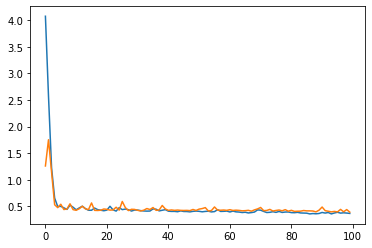

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [55]:
history.history['val_loss']

[0.4050891101360321,
 0.4034000635147095,
 0.4028485119342804,
 0.40654999017715454,
 0.409537136554718,
 0.3986937701702118,
 0.416614830493927,
 0.3965643644332886,
 0.4289083182811737,
 0.398739755153656,
 0.4055376946926117,
 0.4055323898792267,
 0.4053894281387329,
 0.41029950976371765,
 0.4086669087409973,
 0.40324118733406067,
 0.40313559770584106,
 0.39096394181251526,
 0.39237484335899353,
 0.4062623381614685,
 0.4165371358394623,
 0.3883301317691803,
 0.4239402115345001,
 0.39297813177108765,
 0.40637916326522827,
 0.43098554015159607,
 0.38888901472091675,
 0.4297924339771271,
 0.3874342441558838,
 0.3886007070541382,
 0.3955952227115631,
 0.42971307039260864,
 0.415296345949173,
 0.3936159610748291,
 0.4189806580543518,
 0.38186103105545044,
 0.39662235975265503,
 0.3935003876686096,
 0.4145257771015167,
 0.3964122533798218,
 0.4125485122203827,
 0.3861866295337677,
 0.4034576117992401,
 0.38355860114097595,
 0.37817901372909546,
 0.4011683464050293,
 0.38297727704048157,
 